# FORBES RICH PERSON IN THE WORLD BETWEEN 2019-2023

###
The World's Billionaires is an annual ranking of people who are billionaires, They are considered to have a net worth of 1 billion dollars or more. Edit by the American business magazine Forbes.

## Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing necessary libraries for data analysis and visualization.


In [2]:
forbes = pd.concat([
    pd.read_csv('billionaires_2019.csv'),
    pd.read_csv('billionaires_2020.csv'),
    pd.read_csv('billionaires_2021.csv'),
    pd.read_csv('billionaires_2022 .csv'),
    pd.read_csv('billionaires_2023.csv')
    
])
# Concatenating multiple CSV files containing billionaire data from different years into a single dataframe.


## Data Exploring

In [3]:
forbes.head() 
# Displaying the first 5 rows of the 'forbes' dataframe

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,2019,3,1,131.0 B,Bezos,Jeff,Jeff Bezos,1964-01-12,55.0,Male,United States,United States,Seattle,Technology,['Technology'],Amazon.com,Entrepreneur,True,Increased
1,2019,3,2,96.5 B,Gates,Bill,Bill Gates,1955-10-28,63.0,Male,United States,United States,Medina,Technology,['Technology'],Bill & Melinda Gates Foundation,Cofounder,True,Increased
2,2019,3,3,82.5 B,Buffett,Warren,Warren Buffett,1930-08-30,88.0,Male,United States,United States,Omaha,Finance and Investments,['Finance and Investments'],Berkshire Hathaway,CEO,True,Decreased
3,2019,3,4,76.0 B,Arnault,Bernard,Bernard Arnault & family,1949-03-05,70.0,Male,France,France,Paris,Fashion & Retail,['Fashion & Retail'],LVMH Moet Hennessy Louis Vuitton,Chairman and CEO,False,Increased
4,2019,3,5,64.0 B,Slim Helu,Carlos,Carlos Slim Helu & family,1940-01-28,79.0,Male,Mexico,Mexico,Mexico City,Telecom,['Telecom'],América Móvil,Honorary Chairman,True,Decreased


In [4]:
forbes.shape
#Displaying Number Of Rows And Columns

(12311, 19)

In [5]:
forbes.info()
# information about the data types and the memory 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12311 entries, 0 to 2639
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      12311 non-null  int64  
 1   month                     12311 non-null  int64  
 2   rank                      12311 non-null  int64  
 3   net_worth                 12311 non-null  object 
 4   last_name                 12311 non-null  object 
 5   first_name                12286 non-null  object 
 6   full_name                 12311 non-null  object 
 7   birth_date                11966 non-null  object 
 8   age                       11992 non-null  float64
 9   gender                    12266 non-null  object 
 10  country_of_citizenship    12311 non-null  object 
 11  country_of_residence      12234 non-null  object 
 12  city_of_residence         12098 non-null  object 
 13  business_category         12310 non-null  object 
 14  busines

In [6]:
forbes.isna().sum()
#count the number of missing values in each column

year                            0
month                           0
rank                            0
net_worth                       0
last_name                       0
first_name                     25
full_name                       0
birth_date                    345
age                           319
gender                         45
country_of_citizenship          0
country_of_residence           77
city_of_residence             213
business_category               1
business_industries             1
organization_name           10613
position_in_organization    10486
self_made                       0
wealth_status                1350
dtype: int64

## Data Cleaning And Manipulating

In [7]:
forbes=forbes.drop(['first_name','last_name','month','business_industries'],axis=1)
#droping Culomns That Is not Relavent or Duplicate Columns 

In [8]:
forbes.dropna(subset=['business_category','birth_date','gender','country_of_residence','city_of_residence','wealth_status' ], inplace=True)
# Removing rows with missing values in specific columns, I Dropped Nulls Only In Columns That Is Relvant For Me


In [9]:
forbes['business_category'].replace({'Finance and Investments': 'Finance & Investments', 'Food and Beverage': 'Food & Beverage'}, inplace=True)
#updating the correct value names.

In [10]:
forbes['net_worth'] = forbes['net_worth'].str.replace('B','').str.strip().astype(float)
#Eliminating The Lettet B And Changing To Type Float 


In [11]:
forbes.rename(columns={'net_worth':'net_worth (B)'},inplace=True)
#Renaming the 'net_worth' column in the 'forbes'


In [12]:
forbes['birth_date'] = pd.to_datetime(forbes['birth_date'])
# Converting the 'birth_date' column in the 'forbes' DataFrame to datetime format

In [13]:
forbes['birth_date'] = forbes['birth_date'].dt.strftime('%B %d, %Y')
#Formatting the 'birth_date' column

In [14]:
median_age = forbes['age'].median()
forbes['age'].fillna(median_age, inplace=True)
# Filling missing values in the 'age' column with the calculated median age

In [15]:
forbes.head()
#Checking The Df After All The Changes

,year,rank,net_worth (B),full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,organization_name,position_in_organization,self_made,wealth_status
0,2019,1,131.0,Jeff Bezos,"January 12, 1964",55.0,Male,United States,United States,Seattle,Technology,Amazon.com,Entrepreneur,True,Increased
1,2019,2,96.5,Bill Gates,"October 28, 1955",63.0,Male,United States,United States,Medina,Technology,Bill & Melinda Gates Foundation,Cofounder,True,Increased
2,2019,3,82.5,Warren Buffett,"August 30, 1930",88.0,Male,United States,United States,Omaha,Finance & Investments,Berkshire Hathaway,CEO,True,Decreased
3,2019,4,76.0,Bernard Arnault & family,"March 05, 1949",70.0,Male,France,France,Paris,Fashion & Retail,LVMH Moet Hennessy Louis Vuitton,Chairman and CEO,False,Increased
4,2019,5,64.0,Carlos Slim Helu & family,"January 28, 1940",79.0,Male,Mexico,Mexico,Mexico City,Telecom,América Móvil,Honorary Chairman,True,Decreased


In [16]:
forbes.isna().sum()
#count the number of missing values in each column

year                           0
rank                           0
net_worth (B)                  0
full_name                      0
birth_date                     0
age                            0
gender                         0
country_of_citizenship         0
country_of_residence           0
city_of_residence              0
business_category              0
organization_name           8982
position_in_organization    8896
self_made                      0
wealth_status                  0
dtype: int64

## Data Exploring

In [17]:
forbes.info()
# information about the data types and the memory 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10600 entries, 0 to 2639
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      10600 non-null  int64  
 1   rank                      10600 non-null  int64  
 2   net_worth (B)             10600 non-null  float64
 3   full_name                 10600 non-null  object 
 4   birth_date                10600 non-null  object 
 5   age                       10600 non-null  float64
 6   gender                    10600 non-null  object 
 7   country_of_citizenship    10600 non-null  object 
 8   country_of_residence      10600 non-null  object 
 9   city_of_residence         10600 non-null  object 
 10  business_category         10600 non-null  object 
 11  organization_name         1618 non-null   object 
 12  position_in_organization  1704 non-null   object 
 13  self_made                 10600 non-null  bool   
 14  wealth_

In [18]:
forbes.shape
#Diplaying Number Of Rows And Columns

(10600, 15)

In [19]:
forbes.describe()
#statistics of the forbes DataFrame

,year,rank,net_worth (B),age
count,10600.000000,10600.000000,10600.000000,10600.000000
mean,2021.125283,1155.269151,4.732910,65.087830
std,1.404696,698.338513,9.596642,13.037114
min,2019.000000,1.000000,1.000000,22.000000
25%,2020.000000,552.000000,1.500000,56.000000
50%,2021.000000,1116.000000,2.400000,65.000000
75%,2022.000000,1725.000000,4.300000,74.000000
max,2023.000000,2674.000000,219.000000,101.000000


In [20]:
forbes.describe(include='all')
#statistics of the forbes DataFrame,including all data types


,year,rank,net_worth (B),full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,organization_name,position_in_organization,self_made,wealth_status
count,10600.000000,10600.000000,10600.000000,10600,10600,10600.000000,10600,10600,10600,10600,10600,1618,1704,10600,10600
unique,NaN,NaN,NaN,3048,2238,NaN,2,80,82,808,18,452,114,2,4
top,NaN,NaN,NaN,Li Li,"January 01, 1962",NaN,Male,United States,United States,New York,Finance & Investments,Facebook,Investor,True,Increased
freq,NaN,NaN,NaN,9,73,NaN,9429,3091,3144,447,1540,15,199,7397,4628
mean,2021.125283,1155.269151,4.732910,NaN,NaN,65.087830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.404696,698.338513,9.596642,NaN,NaN,13.037114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019.000000,1.000000,1.000000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.000000,552.000000,1.500000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021.000000,1116.000000,2.400000,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.000000,1725.000000,4.300000,NaN,NaN,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
forbes.corr()
# Calculate correlation matrix for the Dataframe


C:\Users\97252\AppData\Local\Temp\ipykernel_35952\269335025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  forbes.corr()


,year,rank,net_worth (B),age,self_made
year,1.000000,0.146248,0.033661,0.017524,0.025198
rank,0.146248,1.000000,-0.445008,-0.097666,0.052604
net_worth (B),0.033661,-0.445008,1.000000,0.032949,-0.013990
age,0.017524,-0.097666,0.032949,1.000000,-0.061125
self_made,0.025198,0.052604,-0.013990,-0.061125,1.000000


In [22]:
forbes['year'].value_counts().sort_index(ascending=True)
#displaying the count of billioners each year in ascending order.

2019    1894
2020    1867
2021    2183
2022    2329
2023    2327
Name: year, dtype: int64

In [23]:
forbes.groupby('country_of_residence')['net_worth (B)'].sum().nlargest(10).reset_index()
#top 10 countries with the highest total sum of net worth

,country_of_residence,net_worth (B)
0,United States,18960.00
1,China,8006.15
2,India,2310.30
3,Germany,1941.00
4,France,1813.50
5,Russia,1754.70
6,United Kingdom,1589.70
7,Hong Kong,1527.90
8,Switzerland,1349.70
9,Canada,701.30


In [24]:
forbes.groupby('country_of_residence')['net_worth (B)'].sum().nsmallest(10).reset_index()
#10 countries with the lowest total sum  of net worth

,country_of_residence,net_worth (B)
0,Dominican Republic,1.1
1,Armenia,1.2
2,Saudi Arabia,1.3
3,Scotland,1.5
4,Kuwait,2.7
5,Angola,3.7
6,Swaziland,4.9
7,Venezuela,7.2
8,Greece,7.4
9,Bahrain,7.4


In [25]:
 forbes.groupby('year')[['year','full_name','net_worth (B)']].head()
#first 5 rows of Highest net_worth For Each Year

,year,full_name,net_worth (B)
0,2019,Jeff Bezos,131.0
1,2019,Bill Gates,96.5
2,2019,Warren Buffett,82.5
3,2019,Bernard Arnault & family,76.0
4,2019,Carlos Slim Helu & family,64.0
0,2020,Jeff Bezos,113.0
1,2020,Bill Gates,98.0
2,2020,Bernard Arnault & family,76.0
3,2020,Warren Buffett,67.5
4,2020,Larry Ellison,59.0


In [26]:
forbes.groupby('full_name')['net_worth (B)'].sum().sort_values(ascending=False).reset_index().head(5)
#top 5 individuals with the highest total net worth.

,full_name,net_worth (B)
0,Jeff Bezos,706.0
1,Bernard Arnault & family,671.0
2,Elon Musk,596.9
3,Bill Gates,551.5
4,Warren Buffett,470.0


In [27]:
forbes['net_worth (B)'].median()
# Calculating the median net worth (in billions) from the 'net_worth (B)'

2.4

In [28]:
forbes['self_made'].value_counts().to_frame()
#provide information about the proportion of self-made individuals compared to those who inherited their wealth

,self_made
True,7397
False,3203


In [29]:
forbes.groupby(['year']).agg({'net_worth (B)': ['max','mean','median'],'age':['max','mean']})
# Grouping by 'year' and aggregating statistics for 'net_worth (B)' and 'age' columns.


net_worth (B)                     age           
               max      mean median    max       mean
year                                                 
2019         131.0  4.188226    2.3  100.0  64.778775
2020         113.0  3.994108    2.2  101.0  64.994644
2021         177.0  5.349565    2.6   99.0  65.010536
2022         219.0  5.060434    2.5  100.0  65.001717
2023         211.0  4.862699    2.5  101.0  65.572841

## Data Visualizion

In [30]:
forbes.head()
#seeing The Df 


,year,rank,net_worth (B),full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,organization_name,position_in_organization,self_made,wealth_status
0,2019,1,131.0,Jeff Bezos,"January 12, 1964",55.0,Male,United States,United States,Seattle,Technology,Amazon.com,Entrepreneur,True,Increased
1,2019,2,96.5,Bill Gates,"October 28, 1955",63.0,Male,United States,United States,Medina,Technology,Bill & Melinda Gates Foundation,Cofounder,True,Increased
2,2019,3,82.5,Warren Buffett,"August 30, 1930",88.0,Male,United States,United States,Omaha,Finance & Investments,Berkshire Hathaway,CEO,True,Decreased
3,2019,4,76.0,Bernard Arnault & family,"March 05, 1949",70.0,Male,France,France,Paris,Fashion & Retail,LVMH Moet Hennessy Louis Vuitton,Chairman and CEO,False,Increased
4,2019,5,64.0,Carlos Slim Helu & family,"January 28, 1940",79.0,Male,Mexico,Mexico,Mexico City,Telecom,América Móvil,Honorary Chairman,True,Decreased


C:\Users\97252\AppData\Local\Temp\ipykernel_35952\1256397892.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 1.0, 'Gender Distribution Among Billionaires')

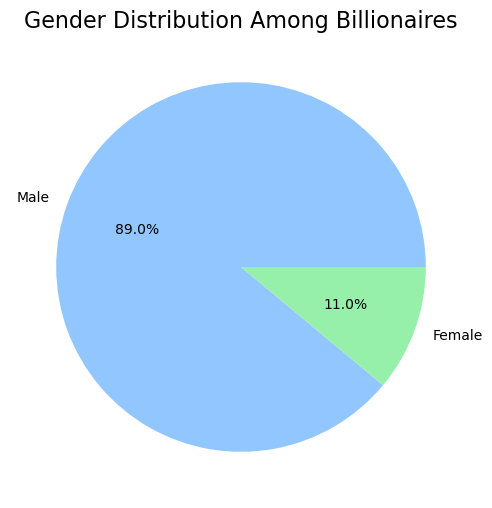

In [31]:
Gender_Distribution=forbes['gender'].value_counts()
plt.style.use('seaborn-pastel')
plt.figure(figsize=(7,6))
plt.pie(Gender_Distribution, labels=Gender_Distribution.index, autopct='%1.1f%%')
plt.title("Gender Distribution Among Billionaires", fontsize=16)


#### We can observe a significant imbalance in gender representation within the Forbes dataset, with notably more men than women.

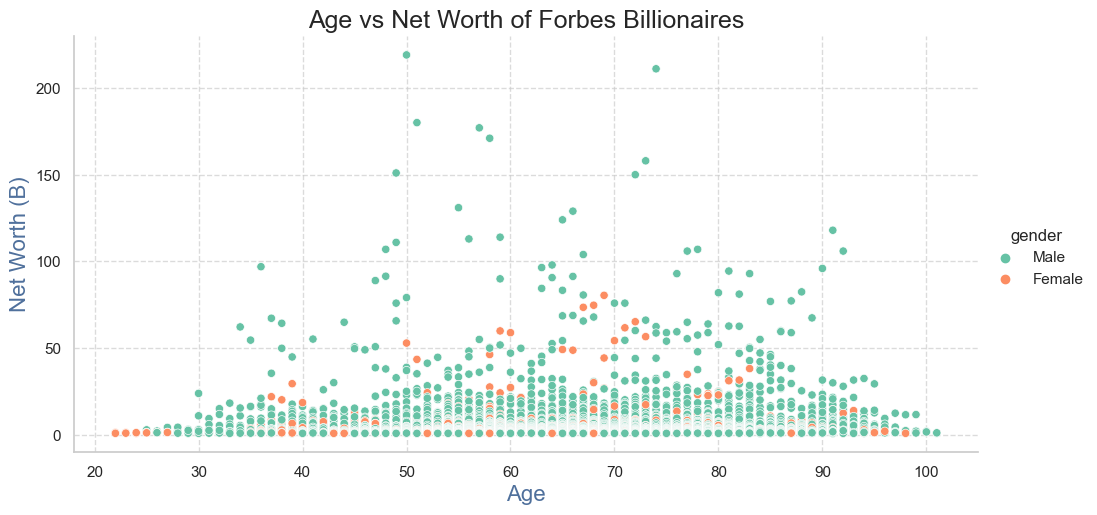

In [32]:
sns.set(style="whitegrid")
sns.relplot(data=forbes, x='age', y='net_worth (B)', aspect=2, kind='scatter',hue='gender', palette='Set2')
plt.title("Age vs Net Worth of Forbes Billionaires",fontsize=18)
plt.xlabel('Age',color='#4F709C',fontsize=16)
plt.ylabel('Net Worth (B)',color='#4F709C',fontsize=16)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#### Analysis reveals that billionaires ages range mostly from 40 to 90, with those possessing higher fortunes typically falling between 45 and 80 years old. We can also observe that men had the highest 'net worth (B)' amounts, exceeding those of women.


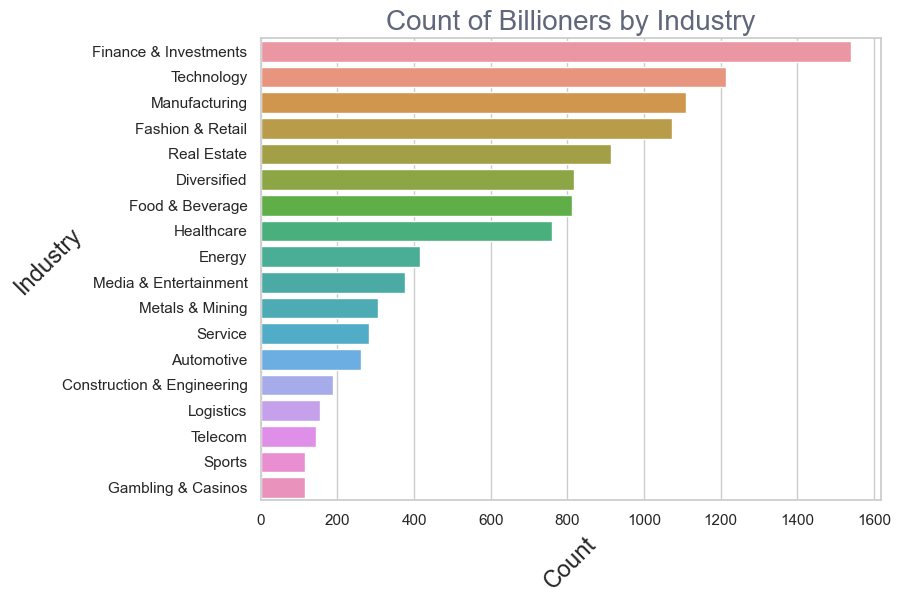

In [33]:
forbes_industries = forbes['business_category'].value_counts()
plt.figure(figsize=(8, 6))  
sns.countplot(data=forbes, y='business_category', order=forbes_industries.index)
plt.xlabel('Count', rotation=45,fontsize=17) 
plt.ylabel('Industry',rotation=45,fontsize=17) 
plt.title('Count of Billioners by Industry',fontsize=20,color='#61677A') 
plt.show()

#### Analysis shows that the majority of billionaires are involved in finance & investments and after technology. Fewer billionaires engage in sports, gambling &  casinos.

In [34]:
Top_50_year_and_selfmade=forbes[(forbes['rank'] >= 1) & (forbes['rank'] <= 50)][['year','full_name', 'net_worth (B)','self_made']]
#filter the Forbes dataset to include entries where the 'rank' between 1 and 50, and then selects specific
#columns ('year', 'full_name', 'net_worth (B)', 'self_made').

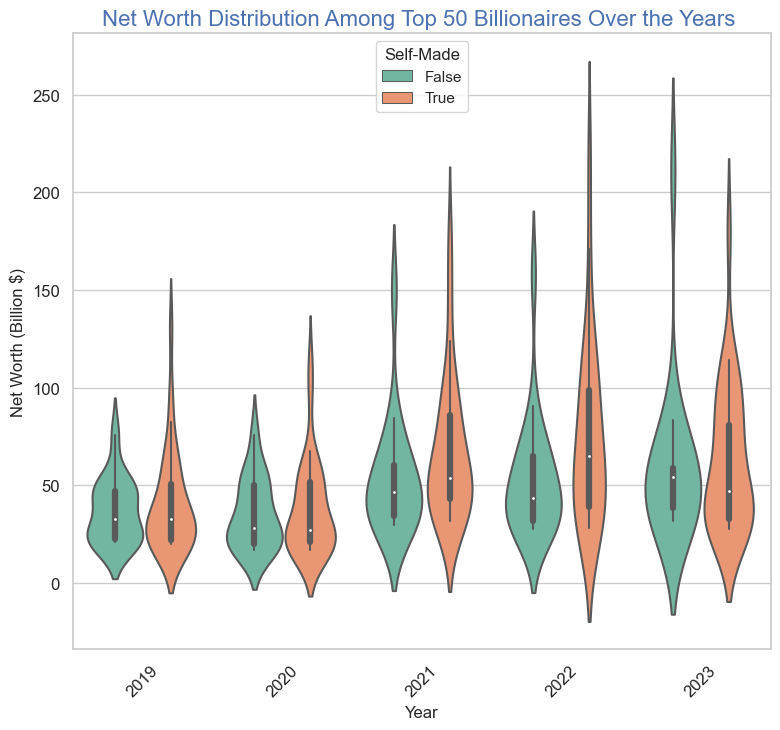

In [35]:
plt.figure(figsize=(9,8))
sns.violinplot(data=Top_50_year_and_selfmade, x="year", y="net_worth (B)", palette="Set2",hue='self_made')
plt.title("Net Worth Distribution Among Top 50 Billionaires Over the Years ",fontsize=16,color='b')
plt.legend(loc='upper center',title='Self-Made')
plt.xlabel("Year")
plt.ylabel("Net Worth (Billion $)")
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

####  In 2021 and 2022, our analysis revealed that self-made billionaires had a higher median net worth compared to those who did not create their wealth themselves.

In [36]:
Top_50_Per_Year = forbes.sort_values(by=['year', 'net_worth (B)'], ascending=[True, False]).groupby('year').head(50)
#sorts the forbes dataset by year and net worth in descending order and then selects the top 50  for each year

In [37]:
Top_50_Per_Year

,year,rank,net_worth (B),full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,organization_name,position_in_organization,self_made,wealth_status
0,2019,1,131.0,Jeff Bezos,"January 12, 1964",55.0,Male,United States,United States,Seattle,Technology,Amazon.com,Entrepreneur,True,Increased
1,2019,2,96.5,Bill Gates,"October 28, 1955",63.0,Male,United States,United States,Medina,Technology,Bill & Melinda Gates Foundation,Cofounder,True,Increased
2,2019,3,82.5,Warren Buffett,"August 30, 1930",88.0,Male,United States,United States,Omaha,Finance & Investments,Berkshire Hathaway,CEO,True,Decreased
3,2019,4,76.0,Bernard Arnault & family,"March 05, 1949",70.0,Male,France,France,Paris,Fashion & Retail,LVMH Moet Hennessy Louis Vuitton,Chairman and CEO,False,Increased
4,2019,5,64.0,Carlos Slim Helu & family,"January 28, 1940",79.0,Male,Mexico,Mexico,Mexico City,Telecom,América Móvil,Honorary Chairman,True,Decreased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,2023,50,27.8,Stephen Schwarzman,"February 14, 1947",76.0,Male,United States,United States,New York,Finance & Investments,Blackstone,Chairman and CEO,True,Decreased
50,2023,51,27.4,Susanne Klatten,"April 28, 1962",60.0,Female,Germany,Germany,Bad Homburg,Automotive,NaN,NaN,False,Increased
51,2023,52,27.0,Gina Rinehart,"February 09, 1954",69.0,Female,Australia,Australia,Perth,Metals & Mining,Hancock Prospecting,Executive Chairman,False,Decreased
52,2023,53,26.7,William Lei Ding,"October 01, 1971",51.0,Male,China,China,Hangzhou,Technology,NaN,NaN,True,Increased


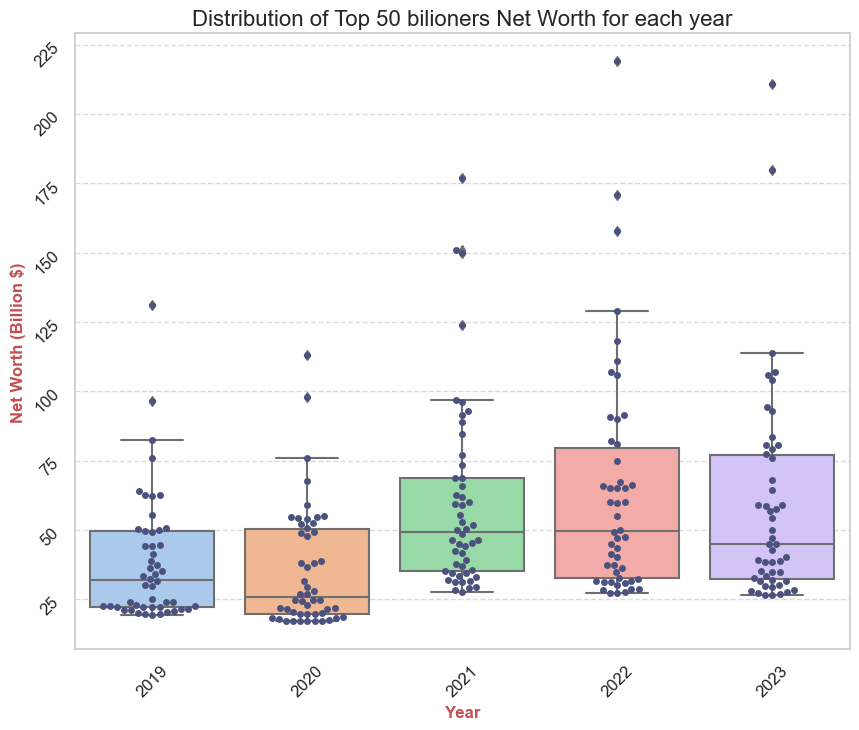

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(Top_50_Per_Year, x="year", y="net_worth (B)", palette="pastel" )
sns.swarmplot(Top_50_Per_Year,x="year", y="net_worth (B)",color='#4B527E')
plt.title("Distribution of Top 50 bilioners Net Worth for each year",fontsize=16)
plt.xlabel("Year",fontweight='bold', color='r')
plt.ylabel("Net Worth (Billion $)",fontweight='bold', color='r')
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12,rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


####  The analysis displays both the median and the exact net worth for each year. we can see that in 2020 the net worth bilioners was the lowest for the past 5 years and in 2021 and 2022 the median was the biggest (around 50 billion)


In [39]:
Top_50=forbes.groupby(['full_name','self_made'])['net_worth (B)'].sum().nlargest(50).to_frame()
#total net worth of the top 50 individuals based on their names and self-made status

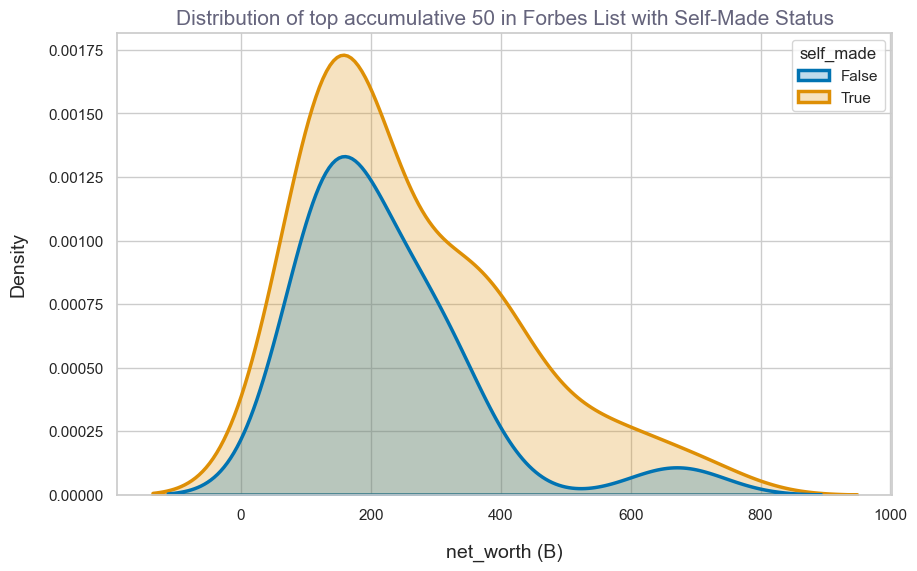

In [40]:
sns.set(style="whitegrid")
sns.set_palette("colorblind")
plt.figure(figsize=(10, 6))
sns.kdeplot(Top_50,x='net_worth (B)',hue='self_made',linewidth=2.5,fill=True)
plt.xlabel("net_worth (B)", fontsize=14, labelpad=15)
plt.ylabel("Density", fontsize=14, labelpad=15)
plt.title("Distribution of top accumulative 50 in Forbes List with Self-Made Status",fontsize='15',color='#65647C')
plt.show()

####  In the list of the 50 richest billionaires (total sum), we observed a higher total wealth among self-made individuals compared to those who didn't achieve their wealth independently.  we can also see that most of the data is in the net worth of 200 billions


In [41]:
wealth=forbes['wealth_status'].value_counts()
# counting the different wealth statuses

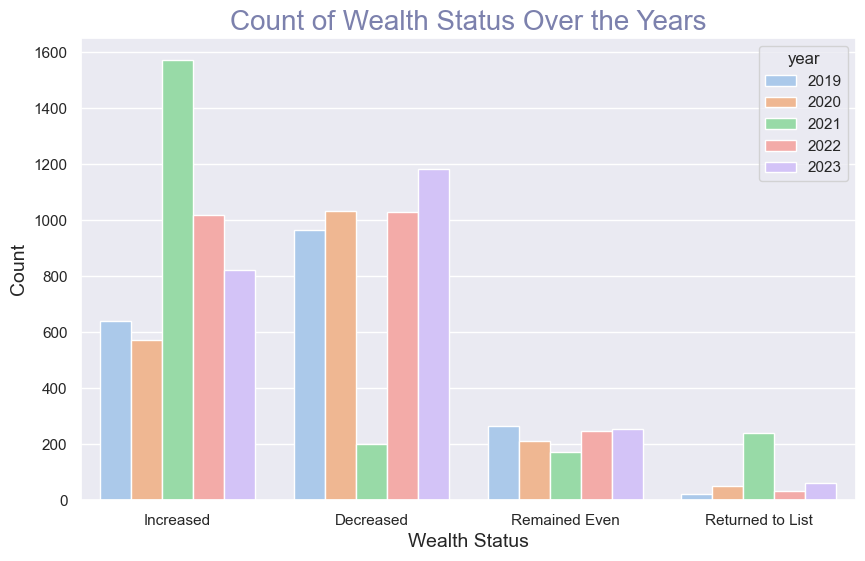

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(forbes,x='wealth_status',order=wealth.index,hue='year', palette='pastel')
plt.title('Count of Wealth Status Over the Years', fontsize=20,color='#7C81AD')
plt.xlabel('Wealth Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#### In 2021, there was a remarkable increase in the wealth of billionaires compared to the previous year. Additionally, this year witnessed the highest number of billionaires returning to the Forbes list.


In [43]:
Top_5 = forbes[(forbes['rank'] >= 1) & (forbes['rank'] <= 5)][['year', 'full_name', 'net_worth (B)']]

#creates a new DataFrame containing  columns 'year', 'full_name', and 'net_worth (B)' for these top 5 each year

In [44]:
Top_5

,year,full_name,net_worth (B)
0,2019,Jeff Bezos,131.0
1,2019,Bill Gates,96.5
2,2019,Warren Buffett,82.5
3,2019,Bernard Arnault & family,76.0
4,2019,Carlos Slim Helu & family,64.0
0,2020,Jeff Bezos,113.0
1,2020,Bill Gates,98.0
2,2020,Bernard Arnault & family,76.0
3,2020,Warren Buffett,67.5
4,2020,Larry Ellison,59.0


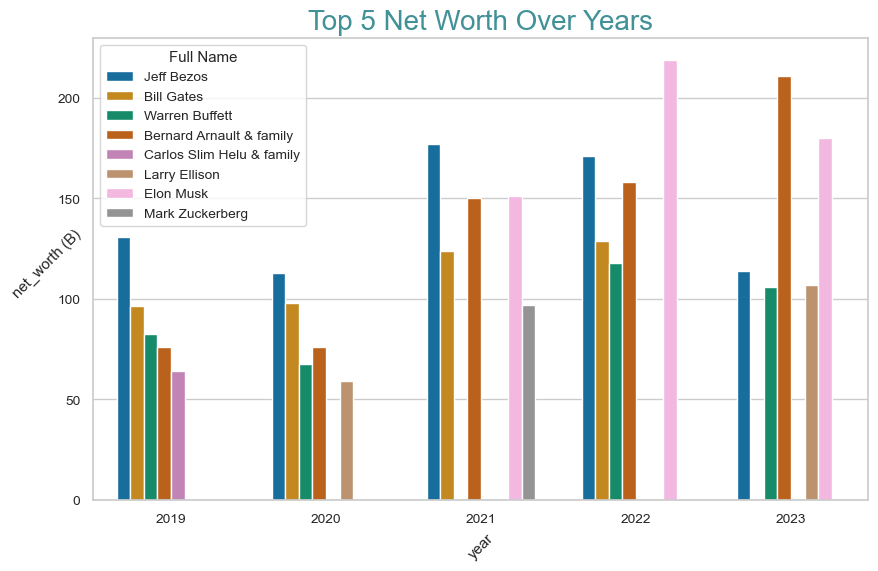

In [45]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=0.9)
plt.figure(plt.figure(figsize=(10, 6)))
sns.barplot(Top_5,x='year',y='net_worth (B)',hue='full_name',palette='colorblind',width=0.7)
plt.title('Top 5 Net Worth Over Years',fontsize=20,color='#419197')
plt.xlabel('year',rotation=45)
plt.ylabel('net_worth (B)',rotation=45)
plt.legend(title='Full Name')

####  Jeff Bezos and Bernard Arnault and Family have sustained a consistent presence on the list for five years. Also, the wealth of Bernard Arnault and his family has shown a steady increase over time. Additionally, Elon Musk entered the list in 2021 and has remained on it since.

Text(0.5, 1.0, 'Count Ages of Billionaires by Year')

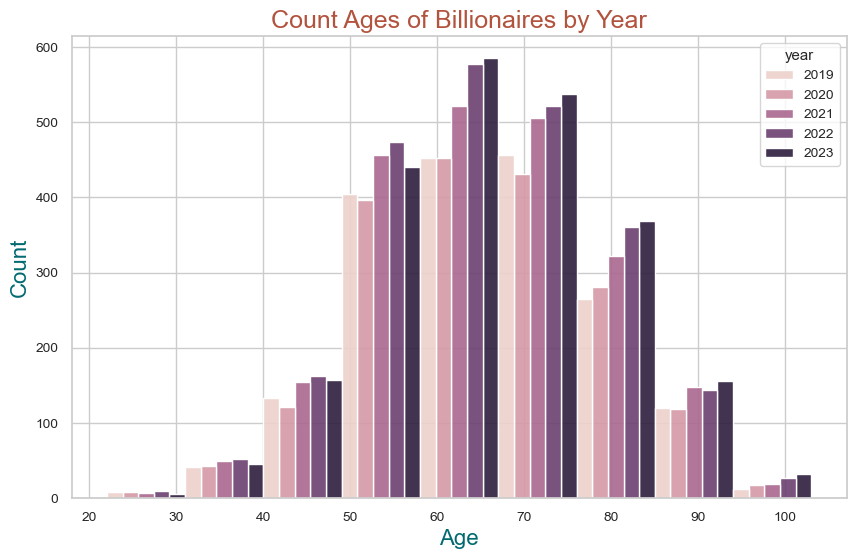

In [46]:
plt.figure(figsize=(10,6))
sns.color_palette("Set2")
sns.histplot(forbes,x='age',hue='year', binwidth=9,multiple='dodge',alpha=0.9)
plt.xlabel('Age',fontsize=16, color='#016A70')
plt.ylabel('Count',fontsize=16,color='#016A70')
plt.title('Count Ages of Billionaires by Year',fontsize=18,color='#B2533E')

#### The analysis reveals that the highest number of billionaires were in their 60s in the years 2022-2023. Additionally, as observed earlier, the majority of billionaires fall within the age range of 45 to 85 years old.


In [47]:
net_cat_year = forbes.groupby(['year', 'business_category'])['net_worth (B)'].sum().reset_index()
#calculates the total net worth (in billions) for each category and year using the 'net_worth (B)' .

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500')])

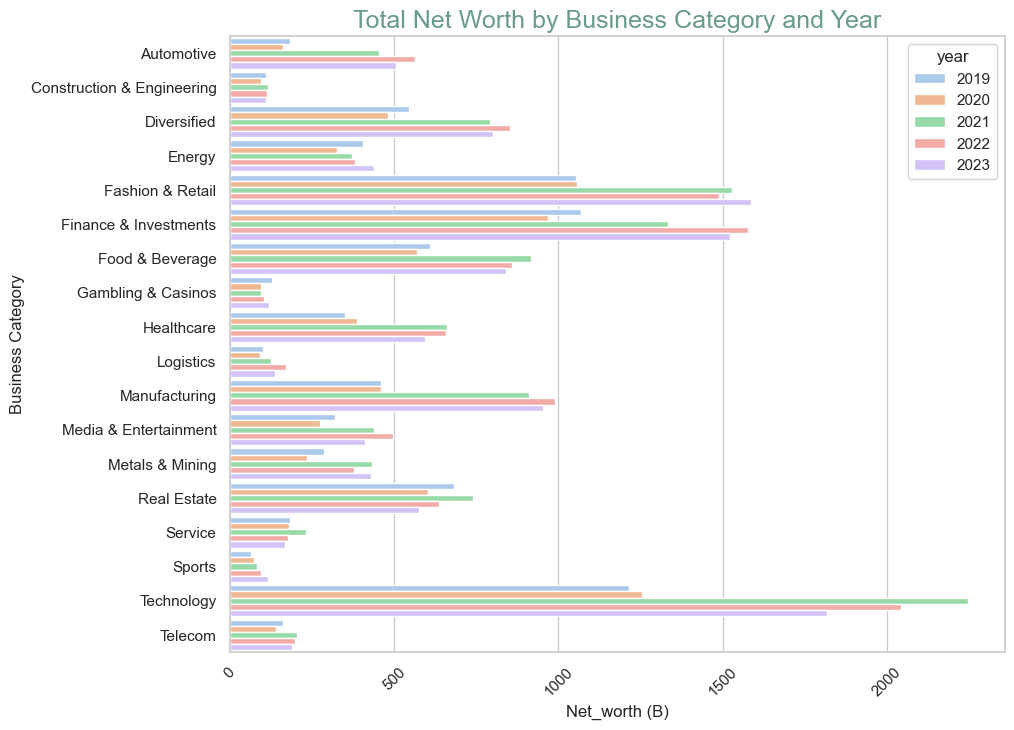

In [48]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.set_palette("pastel")
sns.barplot(data=net_cat_year, y='business_category', x='net_worth (B)', hue='year', dodge=True, width=0.9)
plt.title('Total Net Worth by Business Category and Year',fontsize=18,color='#6A9C89')
plt.xlabel('Net_worth (B)')
plt.ylabel('Business Category')
plt.xticks(rotation=45)

#### The analysis reveals that billionaires working in the technology sector have accumulated the highest net worth (in billions). Furthermore, there was a substantial increase in the net worth of technology billionaires in the year 2021 and beyond.  Another noticeable trend is that after billionaires in the technology sector, those in Finance & Investments and Fashion & Retail have the next highest net worth.

# In conclusion



### The majority of billionaires are men, with a significant number originating from the USA. While Finance & Investments attract many billionaires, those in the technology sector tend to earn the most. The year 2021 witnessed a remarkable increase in wealth across the board. Furthermore, billionaires who built their own fortunes usually earn more than those who inherited their wealth.

# Modeling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Import neccesary mouduls for machine learning

In [50]:
forbes_m = pd.get_dummies(forbes, columns=['wealth_status'], prefix=['wealth_status'])
#convert categorical data into a binary format.

In [51]:
features = ['age']
target_columns = ['wealth_status_Increased', 'wealth_status_Decreased']
X = forbes_m[features]
y = forbes_m[target_columns]
# Splitting the data into features X and target y

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Splitting the data into training and testing sets 


In [53]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# Creating and training the model

LinearRegression()

In [54]:
predictions = lm.predict(X_test)
# Predicting the target values for the test set

In [55]:
predictions_df = pd.DataFrame(predictions, columns=['wealth_status_Increased', 'wealth_status_Decreased'])
# Creating a DataFrame for predictions

In [56]:
X_test_reset_index = X_test.reset_index(drop=True)
# Reset the index of X_test before concatenating with predictions

In [57]:
combined_df = pd.concat([X_test_reset_index, predictions_df], axis=1)
# Combining original test data with predictions


In [58]:
combined_df_melted = combined_df.melt(id_vars=['age'], 
                                       value_vars=['wealth_status_Increased', 'wealth_status_Decreased'],
                                       var_name='wealth_status', value_name='prediction')
# Join the DataFrame for plotting

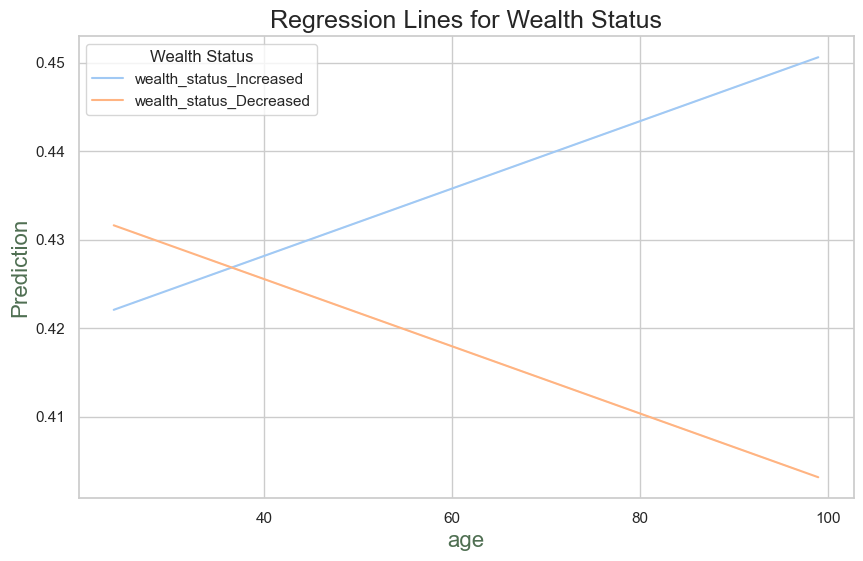

In [59]:
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
sns.lineplot(data=combined_df_melted, x='age', y='prediction', hue='wealth_status' )
plt.xlabel('age',fontsize='16',color='#4F6F52')
plt.ylabel('Prediction',fontsize='16',color='#4F6F52')
plt.title('Regression Lines for Wealth Status',fontsize='18')
plt.locator_params(axis='x', nbins=5) 
plt.legend(title='Wealth Status')
plt.grid(True)
plt.show()
# Creating a line plot with regression lines for both categories


In [60]:
coefficients = lm.coef_
coeff_df = pd.DataFrame(coefficients, columns=features, index=target_columns)
print("Coefficients:")
print(coeff_df)
# Displaying coefficients

Coefficients:
                              age
wealth_status_Increased  0.000381
wealth_status_Decreased -0.000380


###  With increasing age, the chance of achieving higher wealth status rises, while the chance of descending to a lower status decreases. Other options are- maintaining the current status or returning to the list.